In [14]:
!pip install gseapy

In [15]:
import pandas as pd
from gseapy.plot import gseaplot
import gseapy as gp
import numpy as np

In [16]:
df = pd.read_csv('Up_genes_H2A_52_vs_EV_52.tsv', sep='\t').dropna()
df = df.rename(columns = {'Gene_ID': 'Gene'})
#df = df[df.padj < 0.05] it is best practice not to filter
df

,Gene,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
0,Tbx3,100.917979,10.149125,1.916481,5.295708,1.190000e-07,1.240000e-05
1,Cers6,88.079511,9.952960,1.658755,6.000258,1.970000e-09,4.090000e-07
2,Gabrg2,260.336054,9.660704,1.147208,8.421057,3.730000e-17,5.290000e-14
3,Kcnn2,69.626503,9.613651,2.236224,4.299056,1.720000e-05,7.188500e-04
4,Serpinb8,56.685598,9.317137,1.921613,4.848601,1.240000e-06,8.850000e-05
...,...,...,...,...,...,...,...
302,Vwa1,15.002961,2.065310,0.709116,2.912513,3.585332e-03,4.366817e-02
303,Cpne5,64.469709,2.046157,0.451371,4.533209,5.810000e-06,3.060290e-04
304,Pcsk1,151.294137,2.033540,0.493516,4.120515,3.780000e-05,1.337238e-03
305,Lrrn2,151.295524,2.031029,0.245708,8.266013,1.390000e-16,1.810000e-13


In [17]:
df['Rank'] = -np.log10(df['padj'])*df['log2FoldChange']
df = df.sort_values('Rank', ascending = False).reset_index(drop = True)
df

,Gene,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,Rank
0,Gabrg2,260.336054,9.660704,1.147208,8.421057,3.730000e-17,5.290000e-14,128.260763
1,Ephb6,139.465999,8.753028,1.078623,8.115002,4.860000e-16,5.170000e-13,107.544160
2,Prkar2b,106.250015,6.175858,0.679309,9.091377,9.780000e-20,1.660000e-16,97.454371
3,Dync1i1,35.932964,8.661569,1.287090,6.729574,1.700000e-11,6.160000e-09,71.115111
4,Arhgap44,61.834686,6.576660,0.867292,7.582978,3.380000e-14,2.210000e-11,70.078307
...,...,...,...,...,...,...,...,...
302,Zfp978,13.959211,2.262754,0.758404,2.983572,2.849050e-03,3.680834e-02,3.244911
303,Slc6a17,8.890917,2.369262,0.828870,2.858424,4.257507e-03,4.959046e-02,3.090944
304,Frat2,18.113301,2.213449,0.753169,2.938846,3.294372e-03,4.100493e-02,3.070416
305,Vwa1,15.002961,2.065310,0.709116,2.912513,3.585332e-03,4.366817e-02,2.808482


In [18]:
ranking = df[['Gene', 'Rank']]
ranking
print(ranking['Gene'].head())

0      Gabrg2
1       Ephb6
2     Prkar2b
3     Dync1i1
4    Arhgap44
Name: Gene, dtype: object


In [19]:
#gp.get_library_name()
#all_libraries = gp.get_library_name()
#print(all_libraries)
#gmt_file = "m5.go.bp.v2023.1.Mm.symbols.gmt"
gmt_file = "m5.all.v2023.1.Mm.symbols.gmt"
with open(gmt_file, 'r') as file:
    for _ in range(10):
        print(file.readline().split('\t')[2:])

['Parp1', 'Cfh', 'Endog', 'Lig3', 'Mef2a', 'Mpv17', 'Polg', 'Ppargc1a', 'Slc25a36', 'Rnaseh1', 'Rrm1', 'Stox1', 'Flcn', 'Top3a', 'Trp53', 'Twnk', 'Sesn2', 'Akt3', 'Mrpl39', 'Mrpl15', 'Mrpl17', 'Dna2', 'Ssbp1', 'Rrm2b', 'Primpol', 'Polg2', 'Tk2', 'Slc25a33', 'Chchd4', 'Tymp', 'Opa1', 'Atg7', 'Mgme1', 'Mettl4', 'Gimap3', 'Dnaja3\n']


['Zglp1', 'Spink13', 'Apela', 'Gm1993', 'Gm2012', 'Gm2030', 'Gm14525', 'Gm20817', 'Gm20820', 'Fancf', 'Gm16430', 'Gm10488', 'Gm10230', 'H2al1a', 'H2al1c', 'H2al1d', 'H2al1f', 'H2al1g', 'H2al1h', 'H2al1i', 'Gm4297', 'Cfap43', 'Mir741', 'Mir743', 'Mir742', 'Tdrd7', 'Mir881', 'Mir878', 'Mir880', 'Shoc1', 'Mir449b', 'Btbd18', 'AU040320', 'Tmem95', 'Arhgap33os', 'Gm21996', 'Oas1d', 'Gm21095', 'Gm21294', 'Akap9', 'Gm29276', 'Gm21760', 'Gm28576', 'Ttll3', 'Parp11', 'Plekha1', 'Gm29866', 'Rnf212b', 'Gm28919', 'Gm28961', 'Gm28510', 'Gm29554', 'Gm28102', 'Gm21858', 'Gm28870', 'Bbs4', 'Ezhip', 'Nup107', 'Psme4', 'Fbxw11', 'Tubg1', 'Tubg2', 'Adcy3', 'Etv5', 'Kdm3a', 'Tex15', 'Gas8', 'Meig1', 'Mycbpap', 'Vipas39', 'Fancm', 'Spem3', 'Gm20824', 'Akr1c18', 'Fam170b', 'Espl1', 'Eaf2', 'Catsperd', 'Lgr4', 'Asmt', 'Krt9', 'Prl2c5', 'H1f6', 'Cdc20', 'Gm21865', 'Gm20843', 'Gm20890', 'Gm21627', 'Gm20911', 'Gm21117', 'Jmjd1c', 'E2f8', 'Hyal3', 'Arrb1', 'Pgm3', 'Tpgs1', 'Dnah5', 'Dnah1', 'Ehmt2', 'Grk2', 'Amh

['Tdp1', 'Parp1', 'Smc2', 'Tnp1', 'Trpc2', 'Xrcc1', 'Lig4', 'Ercc6', 'Aptx', 'Smc4', 'Ercc8', 'Aplf', 'Sirt1\n']
['Slc15a4', 'Trrap', 'Radx', 'Mbtd1', 'Tex15', 'Nsd2', 'H1f6', 'Shld3', 'Actb', 'Parp1', 'Helb', 'Bcl6', 'Blm', 'Cd28', 'Chek1', 'Epc1', 'Ercc2', 'Smarcad1', 'H1f3', 'H1f0', 'Hdgfl2', 'Ifng', 'Il2', 'Il4', 'Lig3', 'Recql5', 'H1f8', 'Mlh1', 'Msh2', 'Msh3', 'Msh6', 'Pms2', 'Helq', 'Ptprc', 'Rad50', 'Rad51', 'Rad51ap1', 'Rpa2', 'Ruvbl2', 'Foxp3', 'Stat6', 'Supt6', 'Prdm9', 'Vps72', 'Cgas', 'Zfp365', 'Alyref', 'Wrap53', 'Terf2', 'Morf4l1', 'Tgfb1', 'Timeless', 'Cd40', 'Tfrc', 'Tnfsf4', 'Ube2b', 'Was', 'Rmi2', 'Spidr', 'Thoc1', 'Rbbp8', 'Kmt5b', 'Zranb3', 'Epc2', 'Pogz', 'Hmces', 'Ppp4r2', 'Kmt5c', 'Fus', 'Ankle1', 'Parp3', 'Setd2', 'Klhl15', 'Fancb', 'Atad5', 'H1f10', 'Zscan4c', 'Rtel1', 'Trp53bp1', 'Ercc6', 'Zcwpw1', 'H1f2', 'H1f4', 'Sirt6', 'Fbh1', 'Il27ra', 'Rif1', 'H1f9', 'Paxip1', 'Alyref2', 'Morf4l2', 'Ppp4c', 'Actl6a', 'Ruvbl1', 'H1f5', 'Clcf1', 'Terf2ip', 'Tbx21', 'Rad18

In [20]:
pre_res = gp.prerank(rnk=ranking, gene_sets=gmt_file, seed=6, permutation_num=100, min_size=1, max_size=5000, outdir="GSEA_GO")
print(pre_res)

In [21]:
out = []
for term in list(pre_res.results):
    out.append([term,
               pre_res.results[term]['fdr'],
               pre_res.results[term]['es'],
               pre_res.results[term]['nes']])
out_df = pd.DataFrame(out, columns = ['Term','fdr', 'es', 'nes']).sort_values('fdr').reset_index(drop = True)
out_df.to_csv('Upgenes_gsea_gene_ontology.tsv', sep='\t', index=False)

In [22]:
term_to_graph = out_df.iloc[1].Term
term_to_graph

'GOBP_RESPONSE_TO_EXTRACELLULAR_STIMULUS'

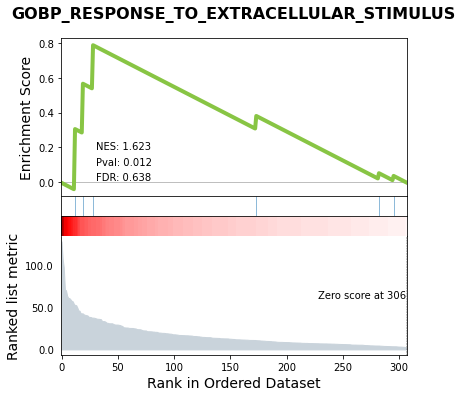

In [23]:
gseaplot(pre_res.ranking, term = term_to_graph, **pre_res.results[term_to_graph])

In [24]:
#gp.get_library_name()
#all_libraries = gp.get_library_name()
#print(all_libraries)
#gmt_file = "m5.go.bp.v2023.1.Mm.symbols.gmt"
Mouse_GO_Pathway_file = "Mouse_Human_Reactome_July_03_2023_symbol.gmt"
with open(Mouse_GO_Pathway_file, 'r') as file:
    for _ in range(10):
        print(file.readline().split('\t')[2:])

['Ikbkb', 'Nfkb2', 'Nfkb1', 'Ikbkg', 'Chuk', 'Nfkbia', 'Rela', '\n']
['Ppp1cb', 'Tubb5', 'Plk4', 'Plk1', 'Alms1', 'Prkar2b', 'Cetn2', 'Rab8a', 'Cep43', 'Cep135', 'Ppp2r1a', 'Cep41', 'Cep131', 'Cul1', 'Cdk1', 'Cenpj', 'Tubb4b', 'Tubb4a', 'Ninl', 'Nedd1', 'Actr1a', 'Haus7', 'Tuba1a', 'Haus8', 'Clasp1', 'Cdk5rap2', 'Pafah1b1', 'Dync1h1', 'Ywhag', 'Cep57', 'Hsp90aa1', 'Pcm1', 'Ppp1r12a', 'Ywhae', 'Dctn2', 'Dctn3', 'Ssna1', 'Nek2', 'Tubg1', 'Skp1', 'Optn', 'Ccnb2', 'Ofd1', 'Akap9', 'Prkaca', 'Fbxw11', 'Dync1i2', 'Cep63', 'Cep152', 'Haus3', 'Tuba4a', 'Haus4', 'Haus5', 'Haus6', 'Btrc', 'Pcnt', 'Csnk1d', 'Sfi1', 'Ckap5', 'Csnk1e', 'Haus1', 'Aurka', 'Haus2', 'Bora', 'Cep250', 'Sdccag8', 'Ajuba', 'Cep78', 'Mapre1', 'Cep76', 'Cep164', 'Cep72', 'Ubc', 'Cep70', 'Ccp110', 'Dynll1', '\n']
['Pias4', 'Rxra', 'Hdac4', 'Ube2i', 'Rara', 'Pgr', 'Nr5a1', 'Pias1', 'Nr4a2', 'Nr3c2', 'Nr3c1', 'Thrb', 'Nr2c1', 'Vdr', 'Sumo3', 'Nr1h2', 'Rora', 'Ppara', 'Esr1', 'Pparg', 'Pias3', 'Ar', '\n']
['Plk1', 'Anapc5', 'An

In [25]:
pathway_res = gp.prerank(rnk=ranking, gene_sets=Mouse_GO_Pathway_file, seed=6, permutation_num=100, min_size=1, max_size=5000, outdir="GSEA_PATHWAY")
print(pathway_res)

In [26]:
out = []
for term in list(pathway_res.results):
    out.append([term,
               pathway_res.results[term]['fdr'],
               pathway_res.results[term]['es'],
               pathway_res.results[term]['nes']])
out_df = pd.DataFrame(out, columns = ['Term','fdr', 'es', 'nes']).sort_values('fdr').reset_index(drop = True)
out_df.to_csv('Upgenes_pathway_results.tsv', sep='\t', index=False)